# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации. 

In [1]:
# Загружаем библиотеки и открываем датасет
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Устанавливаем максимальное количество выводимых на экран столбцов
pd.options.display.max_columns=40

#### Первые строки таблицы

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Общая инофрмация о таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Гистограммы исходных значений таблицы

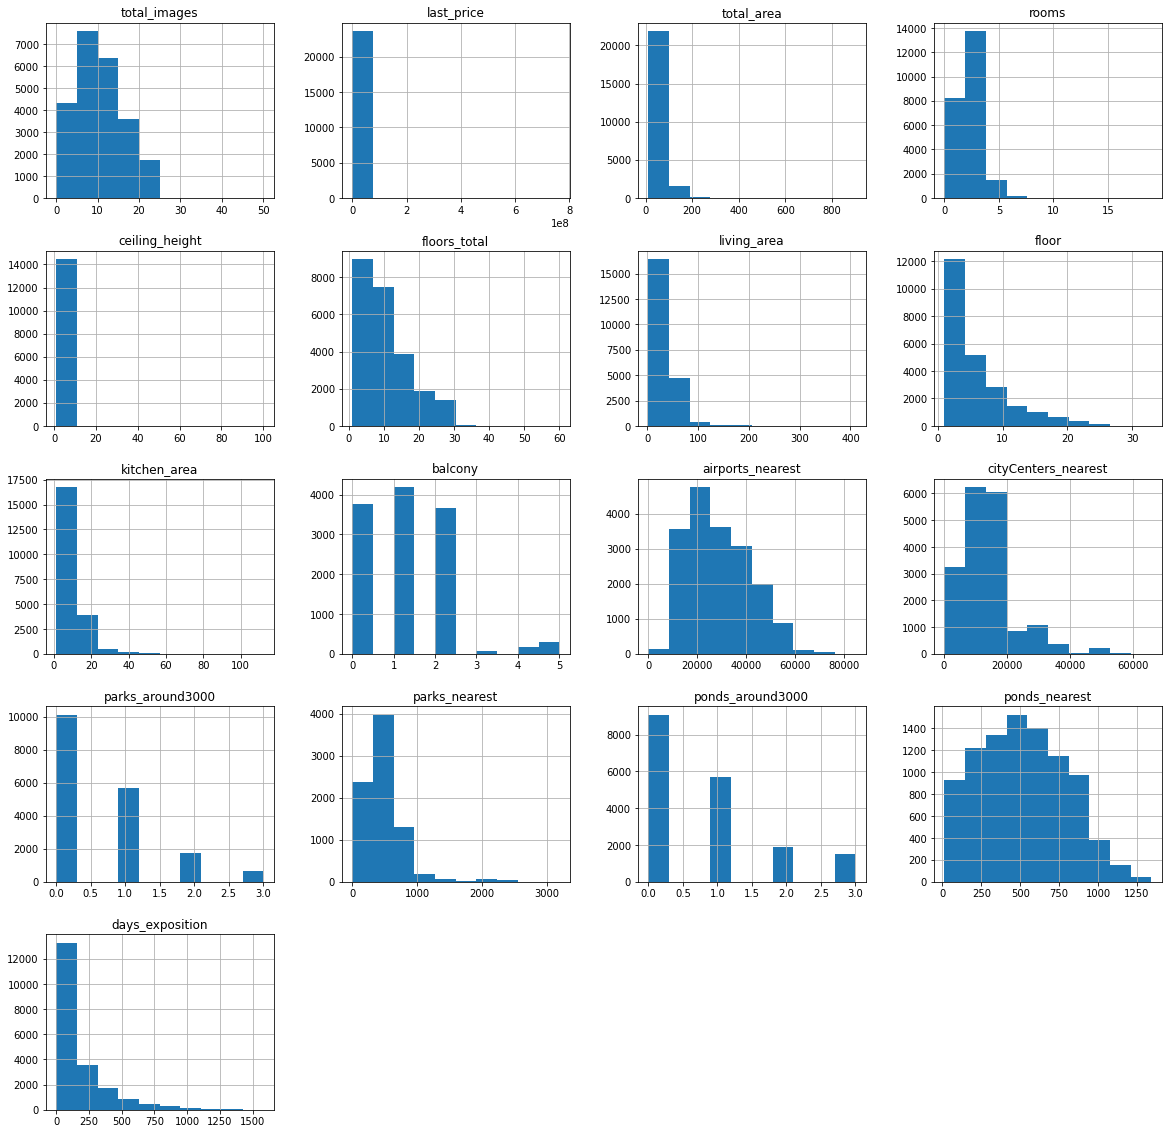

In [5]:
data.hist(figsize=(20, 20))
plt.show()

In [6]:
# создаем переменную, отображающую изначальное количество данных 

initial_data = data.shape[0]
initial_data

23699

In [7]:
# создаем функцию, которая будет вычислять долю оставшегося количества данных от изначального

def shape_diff(df):
    sd = df.shape[0] / initial_data
    print (f'Доля оставшегося количества данных от изначального составляет {sd:.2%}')

### Предобработка данных

#### Находим и изучаем пропущенные значения в столбцах

Для начала узнаем сколько всего пропусков в каждом столбце и их долю

In [8]:
data.isna().sum() # количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data.isna().mean().round(3)*100 # доля пропусков в каждом столбце

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Здесь мы можем увидеть, что пропущенные значения есть в большинстве столбцов, которые могут быть как и намеренными так и ошибочными, поэтому необходимо рассмотреть каждый такой столбец более внимательно.  
В полученных данных мы можем увидеть, что есть два столбца, доля пропусков в которых составляет менее половины одного процента, поэтому от них можно сразу избавиться без потери качества данных, в связи с трудозатратностью и нецелесообразностью ввиду малого количества пропусков, которые сильно не повлияют на анализ.

#### floors_total, locality_name

**Всего этажей в доме, название населённого пункта.** Причинами отсутствия значений в указанных столбцах могут быть совершенно разными, наиболее вероятнее, что это связанно с человеческим фактором, значение забыли указать или оно было равно нулю, в связи с чем поле не заполнили, однако нельзя исключать, что это связано с техническим сбоем, например, при выгрузке данных.  
Стоит отметить, что количество отсутствующих значений в указанных столбцах критически низко, поэтому целесообразность их рассмотрения на предмет заполнения отсутствует, в связи с чем и было принято решение об их исключении.

In [10]:
# создадим копию датасета, чтобы не работать с исходником
tmp = data.copy()

# удаляем строки с пропусками в указанных столбцах
tmp = tmp.dropna(subset=['floors_total','locality_name']) 

#### kitchen_area, living_area

**Площадь кухни, жилая площадь.** Пропуски в данных столбцах составляют 8-10%. Так эти параметры являются одними из ключевых для анализа - пропуски в них необходимо восстановить. Для этого найдем соотношение медианного значения нужной нам площаи (кухни/жилой) к медианному значению общей площади, а затем заполним пропуски, умножив полученное соотношение на общую площадь объекта с пропущенным значением. 

In [11]:
# подготовим функцию 

def fill_ratio(col):
    m_ratio = tmp[col].median() / tmp['total_area'].median()
    tmp[col] = tmp[col].fillna(m_ratio * tmp['total_area'])

In [12]:
fill_ratio('kitchen_area')

In [13]:
fill_ratio('living_area')

#### balcony

Далее разберемся с **балконами.**  
Количество пропусков в данном столбце практически самое большое среди прочих.  
Наиболее вероятно, что здесь пропуски обусловлены отсутсвием балконов, поэтому в этом случае данное поле оставляли пустым.  
Заполним все пропуски значением 0, что будет обозначать отсутвие балкона.

In [14]:
tmp['balcony'] = tmp['balcony'].fillna(0)

#### days_exposition

**Сколько дней было размещено объявление (от публикации до снятия)**. Данный столбец менять не будем, так как, судя по всему, незаполненное поле здесь означает, что объект не продан.

In [15]:
# посмотрим промежуточные результаты
print (tmp.isna().sum()) 
tmp.isna().mean().round(3)*100

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.5
floors_total             0.0
living_area              0.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             0.0
balcony                  0.0
locality_name            0.0
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.7
days_exposition         13.5
dtype: float64

#### is_apartment

**Апартаменты.** Согласно полученной иформации, самое большое количество пропущенных значений находится в этом столбце. Также нам известно, что тип столбца должен быть bool, однако сейчас это object. Очевидно, что пропущенные значения, как и в двух предыдуших случаях, обусловлены тем, что поле пропускали, вместо того, чтобы установить отрицательное значение.  
Заполним пропуски значением False и изменим тип данных на bool.

In [16]:
tmp['is_apartment'] = tmp['is_apartment'].fillna(False).astype(bool)

#### first_day_exposition  

**Дата публикации.** Хоть в этом столбце пропусков нет, но мы можем заметить, что сейчас тип данных в нем int. Данный столбец хранит в себе информацию о дате и времени, поэтому переведем из int в datetime. Наиболее вероятно, что неверный тип данных обусловлен сбоем при выгрузке.

In [17]:
tmp['first_day_exposition'] = pd.to_datetime(tmp['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### locality_name

**Название населённого пункта.** Нам необходимо изучить указанный столбец на предмет уникальных значений и при необходимости устранить неявные дубликаты.

In [18]:
print (tmp['locality_name'].unique()) # сначала взглянем на то, какие уникальные значения находятся в столбце

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [19]:
tmp['locality_name'].nunique() # и их количество

364

Можно заметить, что в уникальных значениях часто встречается одно и тоже, но по-разному написанное, исправим это и посмотрим сколько уникальных значений останется.

In [20]:
tmp['locality_name'] = (
    tmp['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа', 'поселок при железнодорожной станции', 'коттеджный поселок'],
    'поселок', regex=True)
)

tmp['locality_name'].nunique()

321

Отлично, избавились от 43 неявных дубликатов, теперь можно переходить к оставшимся столбцам с пропущенными значениями.

#### ceiling_height

**Высота потолков.** Теперь нам необходимо подумать какими данными заполнить пропуски в данном столбце, на какую известную  информацию нам опираться.  
Можно предположить, что высота потолков будет примерно одинаковой в домах с одинаковой этажностью и расположенных в одном населенном пункте.  
Заполним пропуски медианными значениями.

In [21]:
# делаем отдельную таблицу, 
# в которой будут храниться медианные значения 
# высоты потолка для каждого дома разной этажности в разных населеленных пунктах 

# подготовим функцию для удобства при дальнейшей работе

def medi_merge(column):
    global tmp
    medi_m = (
    tmp.groupby(['floors_total', 'locality_name'])
    .agg({column : 'median'})
    .rename(columns = {column : 'medi'}) #групиируем и находим медианы
)

    # присоединяем новую таблицу к таблице, с которой работаем
    tmp = tmp.merge(medi_m, on = ['floors_total', 'locality_name'])

    # заполняем пропущенные значения высоты потолков медианным значением из прикрепленной таблицы
    tmp.loc[tmp[column].isna(), column] = tmp.loc[tmp[column].isna(), 'medi']
    
    # по завершению удаляем добавленный столбец за его ненадобностью
    del tmp['medi']
    


In [22]:
# выполняем нашу функцию по нахождению медиан и заполнения ими пропусков
medi_merge('ceiling_height')

# проверяем сколько осталось пропусков в столбце и их долю
print (tmp['ceiling_height'].isna().sum())
tmp['ceiling_height'].isna().mean()*100

343


1.4555484829195842

In [23]:
# делаем вывод, что оставшийся процент очень мал, поэтому эти значения можно удалить
tmp = tmp.dropna(subset=['ceiling_height'])
tmp.reset_index(drop=True)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.000000,8,False,False,False,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
2,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.100000,4,False,False,False,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0
3,3,3290000.0,33.0,2018-02-04,1,2.55,16.0,14.000000,3,False,False,False,8.0,0.0,Санкт-Петербург,13943.0,12739.0,0.0,NaN,0.0,NaN,15.0
4,18,10999000.0,97.2,2017-11-13,3,2.50,16.0,56.076923,16,False,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23217,10,1500000.0,43.7,2016-06-28,2,2.55,3.0,28.000000,2,False,False,False,7.3,1.0,деревня Рабитицы,NaN,NaN,NaN,NaN,NaN,NaN,1007.0
23218,0,2800000.0,38.5,2018-02-22,1,2.60,7.0,19.000000,6,False,False,False,8.5,0.0,поселок Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,59.0
23219,20,1770000.0,42.0,2018-09-17,2,2.50,3.0,24.700000,1,False,False,False,8.2,0.0,поселок Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23220,5,1350000.0,40.7,2019-04-04,1,2.50,3.0,18.500000,1,False,False,False,9.0,2.0,поселок Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest

**Расстояние до ближайшего аэропорта, расстояние до центра города, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма.** Самая высока доля пропусков оказалось в этих столбцах, данные здесь были получены автоматически на основе картографических данных. Во избежание риска заполнить оставшиеся пропуски недостоверной информацией, что могло привести к тому, что данные окажутся неактуальными, принято решение их оставить без имзенения.


In [24]:
print(tmp.isna().mean().round(3)*100) # проверим что теперь с пропусками
print() 
shape_diff(tmp) # и какая доля данных осталась

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height           0.0
floors_total             0.0
living_area              0.0
floor                    0.0
is_apartment             0.0
studio                   0.0
open_plan                0.0
kitchen_area             0.0
balcony                  0.0
locality_name            0.0
airports_nearest        22.5
cityCenters_nearest     22.4
parks_around3000        22.4
parks_nearest           65.5
ponds_around3000        22.4
ponds_nearest           61.2
days_exposition         13.4
dtype: float64

Доля оставшегося количества данных от изначального составляет 97.99%


### Посчитайте и добавьте в таблицу новые столбцы

Для проведения анализа необходимо добавить в таблицу дополнительные столбцы.

#### Цена одного квадратного метра

Найдем цену 1 м² для каждого объекта, поделив стоимость объекта на его общую площадь.

In [25]:
tmp['m2_price'] = (tmp['last_price'] / tmp['total_area']).round(2)

#### День недели публикации объявления

In [26]:
tmp['weekday_exp'] = tmp['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [27]:
tmp['month_exp'] = tmp['first_day_exposition'].dt.month

#### Год публикации объявления

In [28]:
tmp['year_exp'] = tmp['first_day_exposition'].dt.year

#### Тип этажа квартиры

Разделим объекты на три категории по типу этажа: первый, последний, другой.

In [29]:
def floor_type_category(flo): 
    if flo['floor'] == 1: 
         tp = 'Первый' 
    elif flo['floor'] == flo['floors_total']: 
         tp = 'Последний' 
    else: 
         tp = 'Другой' 
    return tp 

In [30]:
tmp['floor_type'] = tmp.apply(floor_type_category, axis=1)

In [31]:
tmp['floor_type'].value_counts()

Другой       17146
Последний     3251
Первый        2825
Name: floor_type, dtype: int64

#### Расстояние до центра города в километрах

In [32]:
tmp['km_cityCentr'] = (tmp['cityCenters_nearest'] / 1000).round(0)

#### Цена объекта в млн. руб.

In [33]:
tmp['last_price_mil'] = tmp['last_price'] / 1000000

Выведем первые строки таблицы для того, чтобы проверить результат добавления столбцов.

In [34]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23222 entries, 0 to 23564
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23222 non-null  int64         
 1   last_price            23222 non-null  float64       
 2   total_area            23222 non-null  float64       
 3   first_day_exposition  23222 non-null  datetime64[ns]
 4   rooms                 23222 non-null  int64         
 5   ceiling_height        23222 non-null  float64       
 6   floors_total          23222 non-null  float64       
 7   living_area           23222 non-null  float64       
 8   floor                 23222 non-null  int64         
 9   is_apartment          23222 non-null  bool          
 10  studio                23222 non-null  bool          
 11  open_plan             23222 non-null  bool          
 12  kitchen_area          23222 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

#### Изучение отдельных параметров таблицы

Подготовим функцию с нужными нам инструментами для того, чтобы немного ускорить процесс анализа

In [35]:
def analys(col):
    global tmp
    print ('Описание данных')
    print ()
    print (tmp[col].describe())
    print ()
    print ('Диаграмма размаха')
    tmp.boxplot(col, vert=False)
    plt.show()

##### Общая площадь

Рассмотрим столбец с данным об общей площади объекта.

Описание данных

count    23222.000000
mean        60.467533
std         35.831686
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Диаграмма размаха


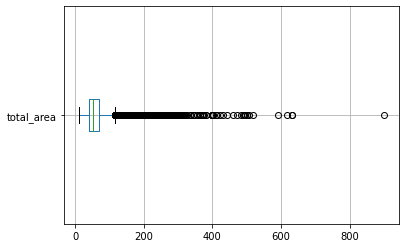

In [36]:
analys('total_area')

Из полученных результатов мы можем заметить большое количество выбросов, ничего удивительного в которых нет, ведь для площади это нормально.  
Также присутствует несколько объектов с аномальными значениями, отбросим их и построим гистограмму, выбросы с площадью более 200 квадратов отображать не будем. 

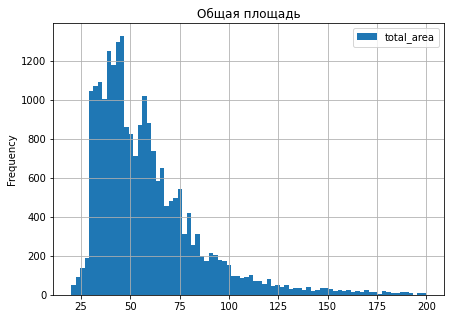

In [37]:
tmp = tmp.query('total_area < 550')
tmp.reset_index(drop=True)
tmp.plot(y='total_area', kind='hist', figsize=(7, 5), bins=80, range=(20,200), grid=True, title='Общая площадь')
plt.show()

Распределение нормальное, чаще всего в продаже находятся объекты площадью примерно 35-50 м².

##### Жилая площадь

Описание данных

count    23217.000000
mean        34.637848
std         22.003651
min          2.000000
25%         19.000000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

Диаграмма размаха


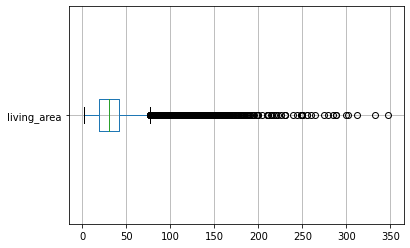

In [38]:
analys('living_area')

При изучении жилой площади первое, что бросается в глаза - это ее минимальное значение в столбце, равное 2 м².  
Явная аномалия, будем считать, что жилая площадь менее 8 м² нам не подходит и исключим такие строки.  
На диаграмме размаха можно заметить анамалии, отбросим площади, которые составляют более 200 квадратов.  
Затем построим гистограмму, выбросы со значениями более 120 квадратов отображать не будем.

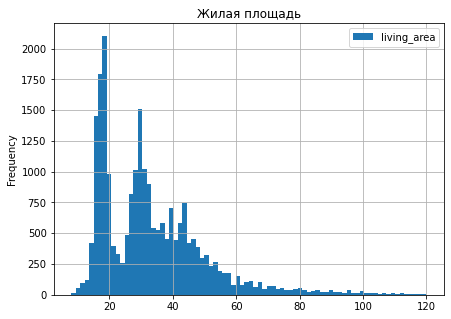

In [39]:
tmp = tmp.query('(living_area >= 8) & (living_area <= 200)')
tmp.reset_index(drop=True)
tmp.plot(y='living_area', kind='hist', figsize=(7, 5), bins=80, range=(8,120), grid=True, title='Жилая площадь')
plt.show()

Глядя на гистограмму, можем увидеть, что самый большые пики площадей приходятся на объекты с жилой площадью 10-19 квадратов и 30 квадратов.

##### Площадь кухни

Описание данных

count    23168.000000
mean        10.447732
std          5.763042
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Диаграмма размаха


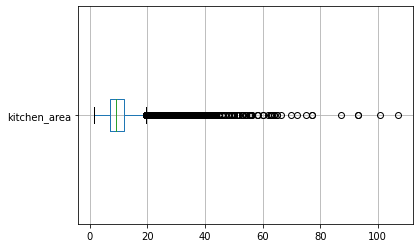

In [40]:
analys('kitchen_area')

Сразу можно заметить аномально низкое значение минимальной кухонной площади. 
Скорее всего сюда входят кухни-ниши, поэтому решаем исклюить все кухни ниже 5 квадратов.  
Также имеются аномалии с очень большими кухнями, уберем кухни площадью более 65 квадратов.
На гистограмме отбросим большинство выбросов и рассмотрим кухни от 5 до 30 квадратов

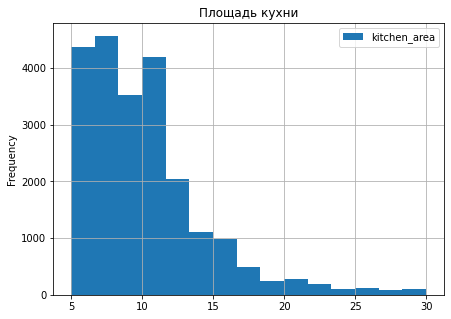

In [41]:
tmp = tmp.query('(kitchen_area >= 5) & (kitchen_area <= 65)')
tmp.reset_index(drop=True)
tmp.plot(y='kitchen_area', kind='hist', figsize=(7, 5), bins=15, range=(5,30), grid=True, title='Площадь кухни')
plt.show()


Распределение площади кухни нормальное, наиболее чаще встречаются кухни площадью 5-12 квадратов.

##### Цена объекта

Описание данных

count    22742.000000
mean         6.427027
std          7.894180
min          0.012190
25%          3.500000
50%          4.700000
75%          6.850000
max        330.000000
Name: last_price_mil, dtype: float64

Диаграмма размаха


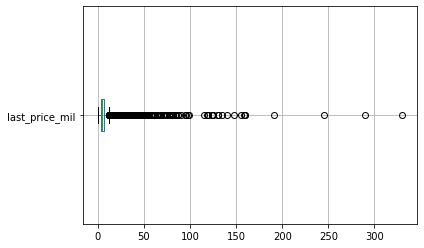

In [42]:
analys('last_price_mil')

Сразу обращаем внимание на аномалии: исключим цены ниже 0.5 млн. руб. и выше 170 млн.
Также на диаграмме видно большое количество выбросов, особенно начиная с 50 млн. руб., удалять их не будем, но на гистограмме отбросим.

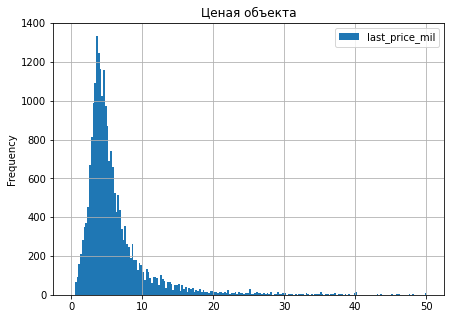

In [43]:
tmp = tmp.query('(last_price_mil >= 0.5) & (last_price_mil <= 170)')
tmp.reset_index(drop=True)
tmp.plot(y='last_price_mil', kind='hist', figsize=(7, 5), bins=200, range=(0,50), grid=True, title='Ценая объекта')
plt.show()

Видим нормальное распределение, пик цены приходится на 5 млн. руб.

##### Количество комнат

Описание данных

count    22731.000000
mean         2.087766
std          1.044793
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Диаграмма размаха


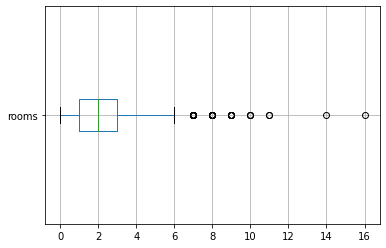

In [44]:
analys('rooms')

По данным видно, что в данных присутствует объекты, количество комнат в которых равно нулю, рассмотрим подробнее, чтобы определить аномалии это или выброс.

In [45]:
tmp.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,weekday_exp,month_exp,year_exp,floor_type,km_cityCentr,last_price_mil
361,16,3500000.0,29.2,2017-04-16,0,2.64,16.0,16.7,3,False,True,False,5.1100,2.0,Санкт-Петербург,17693.0,12516.0,0.0,NaN,0.0,NaN,28.0,119863.01,6,4,2017,Другой,13.0,3.500
814,13,3600000.0,32.8,2017-07-17,0,2.80,16.0,23.2,4,False,True,False,5.7400,1.0,Санкт-Петербург,49888.0,16139.0,1.0,472.0,0.0,NaN,169.0,109756.10,0,7,2017,Другой,16.0,3.600
896,17,2600000.0,31.1,2017-10-25,0,2.70,16.0,21.4,14,False,False,True,5.4425,2.0,Санкт-Петербург,19212.0,22637.0,0.0,NaN,1.0,457.0,44.0,83601.29,2,10,2017,Другой,23.0,2.600
930,16,3699000.0,29.0,2017-11-11,0,2.70,16.0,19.0,11,False,False,True,5.0750,2.0,Санкт-Петербург,10949.0,12890.0,0.0,NaN,0.0,NaN,70.0,127551.72,5,11,2017,Другой,13.0,3.699
1005,7,3600000.0,29.0,2018-10-13,0,2.80,16.0,20.0,16,False,True,False,5.0750,0.0,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,7.0,124137.93,5,10,2018,Последний,12.0,3.600


На срезе обращаем внимание, что у этих комнат стоит признак студии или открытой планировки. Проверим гипотезу, что все объекты, количество комнат в которых равно нулю, это студии или объекты с октрытой планировкой.

In [46]:
tmp.query('rooms == 0 & studio == False & open_plan == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,weekday_exp,month_exp,year_exp,floor_type,km_cityCentr,last_price_mil


Методом от обратного мы подтвердили нашу гипотезу, действительно, объекты с нулевым значением комнат это студии и объекты с открытой планировкой, из чего можно сделать вывод, что это не аномалии, а выброс. В таком случае удалять их не будем, однако на графике отображать не будем. Аномалии с 14-16 комнатами можем удалить.

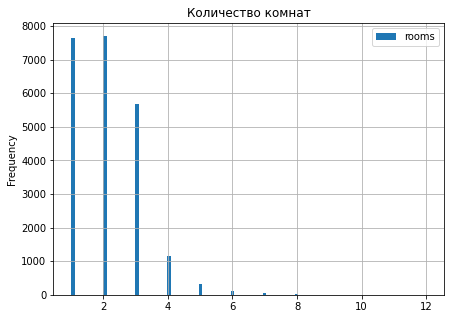

In [47]:
tmp = tmp.query('rooms <= 12')
tmp.reset_index(drop=True)
tmp.plot(y='rooms', kind='hist', figsize=(7, 5), bins=100, range=(1,12), grid=True, title='Количество комнат')
plt.show()

Большая часть объектов имеет 1-3 комнаты, по гистограмме видно, что количестов объектов с 4 и более комнатами значительно ниже.

##### Высота потолков

Описание данных

count    22729.000000
mean         2.735868
std          1.005691
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Диаграмма размаха


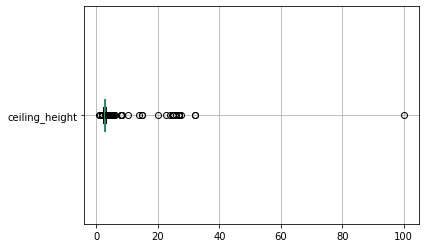

In [48]:
analys('ceiling_height')

Из полученных данных наблюдаем аномалии: минимальное значение потолка равно 1 метру, что явно не может быть правдой, выбивающееся значение в 100 метров, и подозрительные выбросы с потолками в 20-40 метров.  
Анамальные значения с потолками ниже 2 метров исключим, исключим и 100 метровые. Значение выбросов с потолками 20-40 разделим на 10, скорее всего при внесении данных ошибочно не поставили разделитель в виде точки.

In [49]:
# подготовим функцию, которая будет делить на 10 высоту потолков, находящуюся с пределах 20-40 метров
def height_change(h):
    if 20 <= h <= 40:
        return h/10
    else:
        return h

Описание данных

count    22725.000000
mean         2.710069
std          0.289480
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         15.000000
Name: ceiling_height, dtype: float64

Диаграмма размаха


/tmp/ipykernel_1088/884388005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['ceiling_height'] = tmp['ceiling_height'].apply(height_change) # применяем функцию


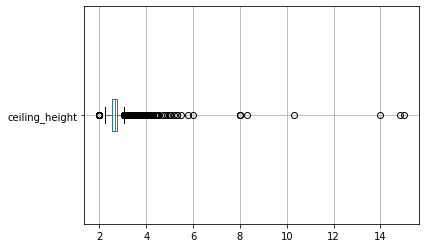

In [50]:
tmp['ceiling_height'] = tmp['ceiling_height'].apply(height_change) # применяем функцию
tmp = tmp.query('(ceiling_height >= 2) & (ceiling_height <= 20)')
tmp.reset_index(drop=True)
analys('ceiling_height')

Теперь видим еще несколько аномалий от 4.5 метров, избавимся и от них и построим гистограмму.

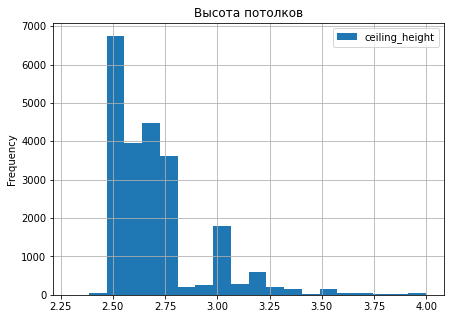

In [51]:
tmp = tmp.query('ceiling_height < 4.5')
tmp.reset_index(drop=True)
tmp.plot(y='ceiling_height', kind='hist', figsize=(7, 5), bins=20, range=(2.3, 4), grid=True, title='Высота потолков')
plt.show()

Наибольшее количество объектов имеет высоту потолков 2.5 метра. 

##### Тип этажа квартиры

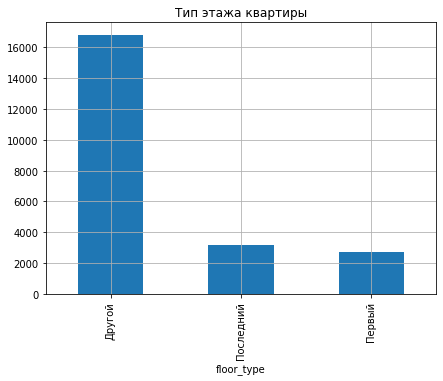

In [52]:
tmp.value_counts('floor_type').plot(kind='bar', figsize=(7, 5), grid=True, title='Тип этажа квартиры')
plt.show()

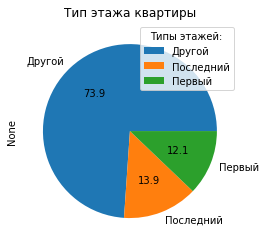

In [53]:
tmp.value_counts('floor_type').plot(autopct='%.1f', kind='pie', title='Тип этажа квартиры')
plt.legend(title='Типы этажей:')
plt.show()

Объектов на последнем и первом этажах продавалось почти одинаковое количество.  
Доля "других" этажей составляет чуть менее трети части от всех типов.

##### Общее количество этажей в доме

Описание данных

count    22694.000000
mean        10.655063
std          6.531295
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Диаграмма размаха


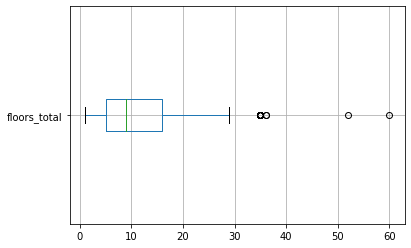

In [54]:
analys('floors_total')

Присутствуют аномалии со значением выше 50 и выбросы между 30 и 40. Удалим первые, а вторые на графике отображть не будем. 

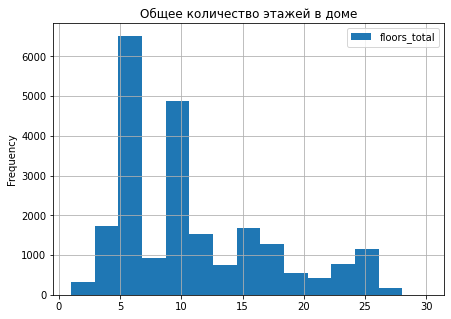

In [55]:
tmp = tmp.query('floors_total < 50')
tmp.reset_index(drop=True)
tmp.plot(y='floors_total', kind='hist', figsize=(7, 5), bins=15, range=(1,30), grid=True, title='Общее количество этажей в доме')
plt.show()

Больше всего объектов продавалось в 5-ти и 9-ти этажных домах.

##### Расстояние до центра города в метрах

Описание данных

count    17695.000000
mean     14181.423227
std       8562.580414
min        181.000000
25%       9274.000000
50%      13098.000000
75%      16268.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Диаграмма размаха


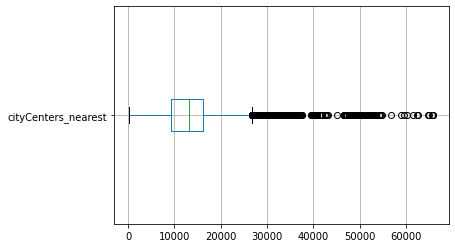

In [56]:
analys('cityCenters_nearest')

В среднем расстояние от объектов до центра города составляет 13-14 км.  
Можно увидеть большое количество выбросов, однако эту информацию опровергнуть самостоятельно невозможно, поэтому здесь удалять аномалии не будем.

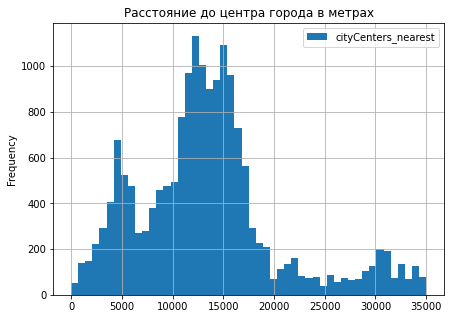

In [57]:
tmp.plot(y='cityCenters_nearest', 
         kind='hist', figsize=(7, 5), bins=50, range=(0,35000), 
         grid=True, title='Расстояние до центра города в метрах')
plt.show()

##### Расстояние до ближайшего парка

Описание данных

count    7892.000000
mean      490.897998
std       342.193267
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Диаграмма размаха


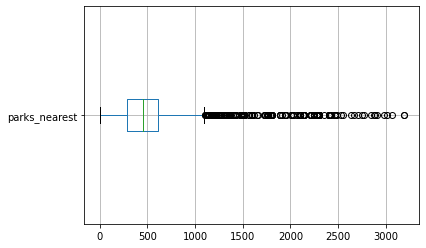

In [58]:
analys('parks_nearest')

Здесь мы видим, что, минимальное расстояние до парка составляет один метр, что вполне реальное и не является ошибкой, выбросов много, однако выявить аномальные значения не представляется возможным.  
Среднее значение и медианное не сильно отличается друг от друга и составляет примерно 455-490 метров.  
Построим гистограмму.

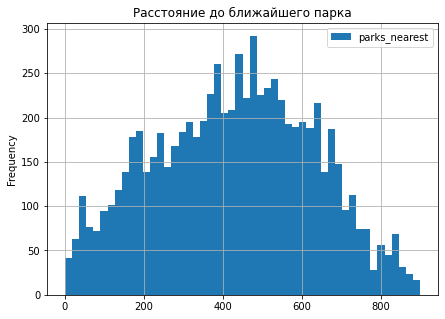

In [59]:
tmp.plot(y='parks_nearest', 
         kind='hist', figsize=(7, 5), bins=50, 
         range=(0,900), grid=True, title='Расстояние до ближайшего парка')
plt.show()

Распределение нормальное, график подтверждает, что подавляющее количество объектов распологаются в пределах 455-490 метров.

Перед тем как приступить к анализу посмотрим на то, что у нас с долей оставшегося количества данных от изначального.

In [60]:
shape_diff(tmp)

Доля оставшегося количества данных от изначального составляет 95.75%


Количество данных снизилось всего менее чем на 5%, а это значит, что качество данных не утеряно, можно приступать к анализу.

#### Изучим, как быстро продавались квартиры

Описание данных

count    19639.000000
mean       182.256225
std        220.624834
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Диаграмма размаха


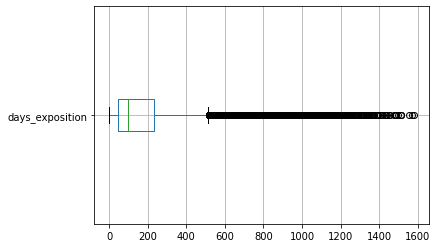

In [61]:
analys('days_exposition')

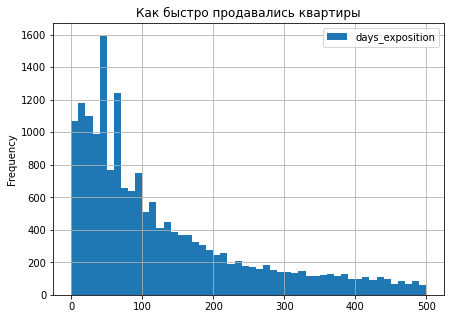

In [62]:
tmp.plot(y='days_exposition', 
         kind='hist', figsize=(7, 5), bins=50, 
         range=(0,500), grid=True, title='Как быстро продавались квартиры')
plt.show()

В среднем квартиры продавались за 182 дней, медианное значение составляет 97 дня. Как видим, есть случаи продажи квартир за один день, а есть и невероятно долгие, как 1580 дней.  
Быстрыми можно считать продажи в течение полутора месяца, долгими - от 230 дней и более.
На графике можно увидеть распределение Пуссона.

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

In [63]:
# подготовим функцию для построения графика рассеивания для параметров площадей и нахождения корреляции
def area_plotncorr(area):
    tmp.plot(x=area, y='last_price_mil', kind='scatter', alpha=0.1, ylim=(0,60), figsize=(7, 5), grid=True, title="График рассеивания")  
    plt.show()
    corr = tmp[area].corr(tmp['last_price_mil'])
    print(f'Коэффициент корреляции равен {corr}')

##### Общая площадь

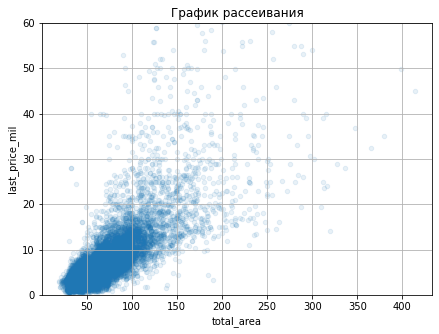

Коэффициент корреляции равен 0.7294786451879091


In [64]:
area_plotncorr('total_area')

Из полученных данных можно сделать вывод, что общая площадь напрямую влияет на стоимость, с ростом площади увеличается и стоимость, об этом же говорит и положительный коэффициент корреляции, однако на графике можно заметить и отдельные выбросы.

##### Жилая площадь

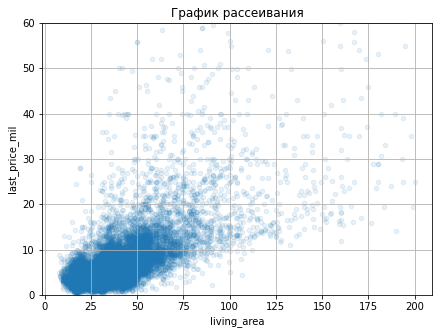

Коэффициент корреляции равен 0.6520040300384992


In [65]:
area_plotncorr('living_area')

Хоть коэффициент корреляции и положительный, но уже не такой явный как в случае с общей площадью. Жилая площадь очевидно влияет на рост цены, но уже не так очевидно. Можно заметить большой пласт квартир с жилой площадью от 10 до 50 квадратов, имеющих примерно одинаковую цену в диапозоне до 10 миллионов

##### Площадь кухни

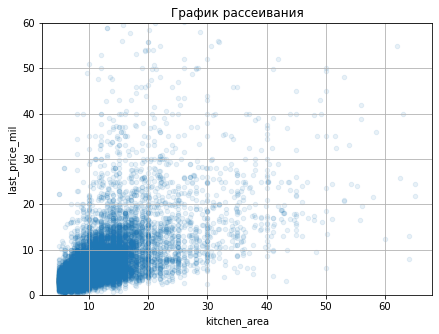

Коэффициент корреляции равен 0.5636316985633649


In [66]:
area_plotncorr('kitchen_area')

По полученным данным можно увидить, что из всех площадей площадь кухни влияет на стоимость в наименьшей степени. Я бы не стал брать её площадь в основопологающие факторы цены.

##### Количество комнат

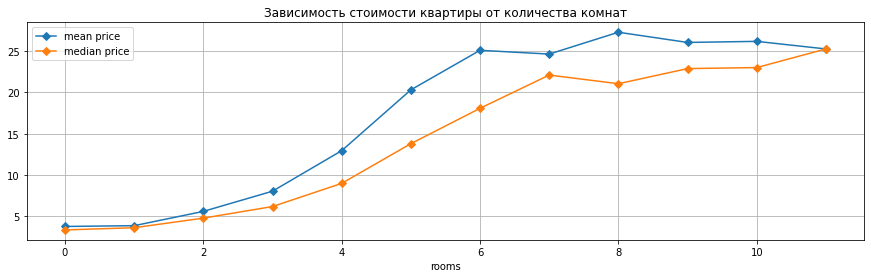

In [67]:
(
    tmp.pivot_table(
        index='rooms', 
        values='last_price_mil', 
        aggfunc=['mean', 'median'])
    .plot(
        style='D-', 
        grid=True, 
        figsize=(15, 4), 
        title='Зависимость стоимости квартиры от количества комнат')
)
plt.legend(['mean price','median price'], loc=2)
plt.show()

Благодаря графику мы можем увидеть, что средняя цена квартиры и ее медиана напрямую зависят от количества комнат.

##### Этаж (тип этажа), на котором расположена квартира

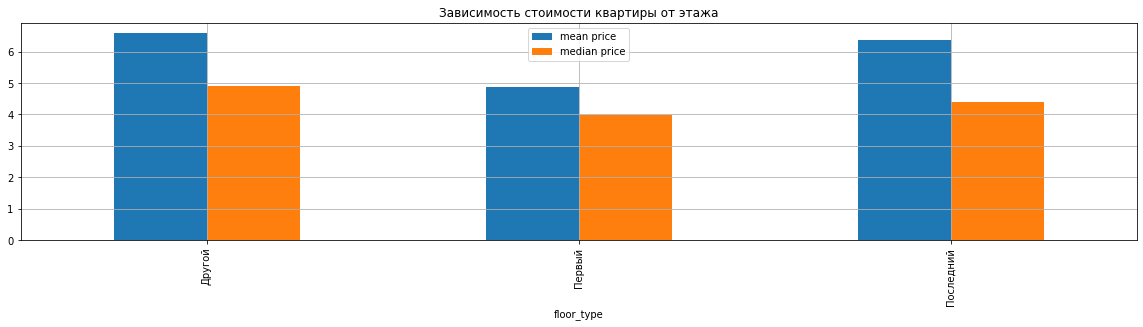

In [68]:
(
    tmp.pivot_table(
        index='floor_type', 
        values='last_price_mil', 
        aggfunc=['mean', 'median'])
    .plot(
        kind='bar', 
        grid=True, 
        figsize=(20, 4),
        title='Зависимость стоимости квартиры от этажа')
)
plt.legend(['mean price','median price'], loc=9)
plt.show()

По графику мы видим, что выбор этажа почти не влияет на стоимость, однако стоит отметить, что первый этаж зачастую будет дешевле остальных, это можно аргументировать плохими условиями - шум от улиц и охлаждаемость помещения зимой.

##### Дата размещения (день недели, месяц, год)

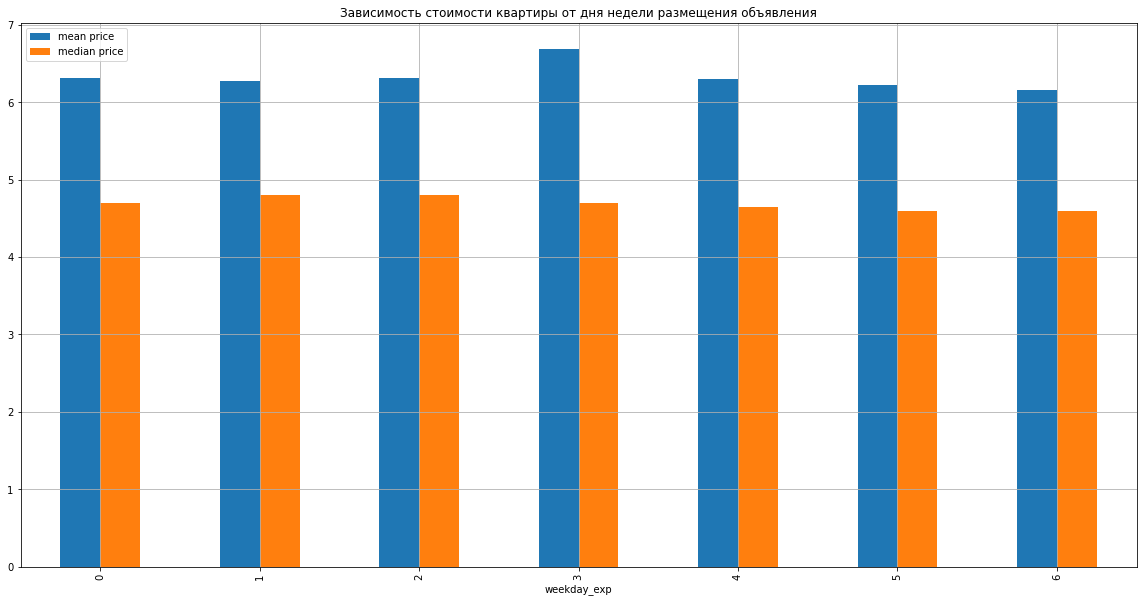

In [69]:
(
    tmp.pivot_table(
        index='weekday_exp', 
        values='last_price_mil', 
        aggfunc=['mean', 'median'])
    .plot(
        kind='bar', 
        grid=True, 
        figsize=(20, 10),
        title='Зависимость стоимости квартиры от дня недели размещения объявления')
)
plt.legend(['mean price','median price'], loc=2)
plt.show()

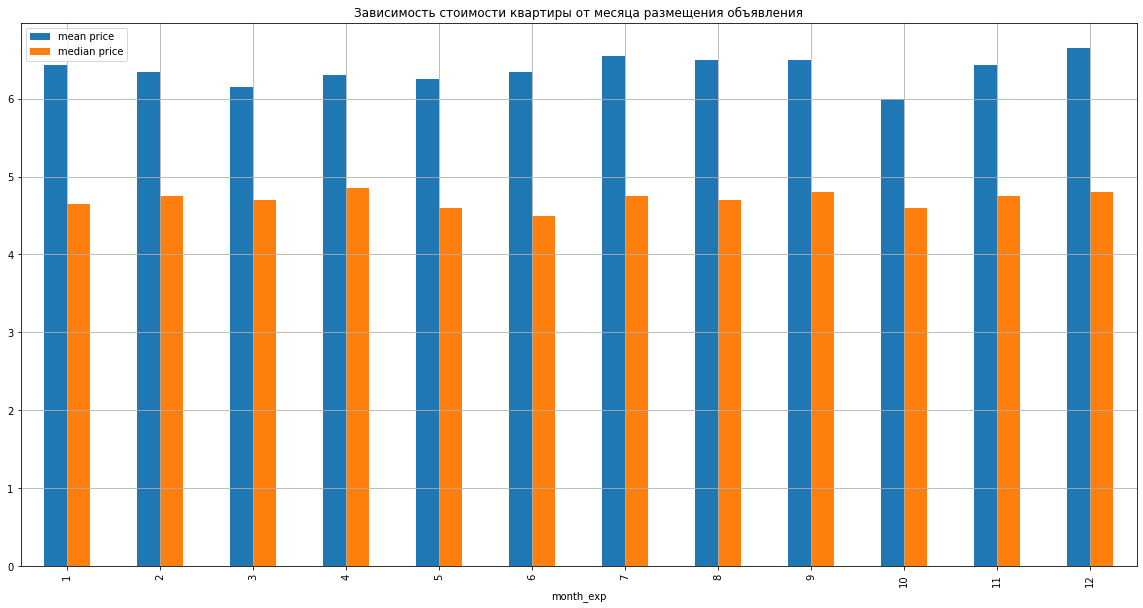

In [70]:
(
    tmp.pivot_table(
        index='month_exp', 
        values='last_price_mil', 
        aggfunc=['mean', 'median'])
    .plot(
        kind='bar', 
        grid=True, 
        figsize=(20, 10),
        title='Зависимость стоимости квартиры от месяца размещения объявления')
)
plt.legend(['mean price','median price'], loc=2)
plt.show()

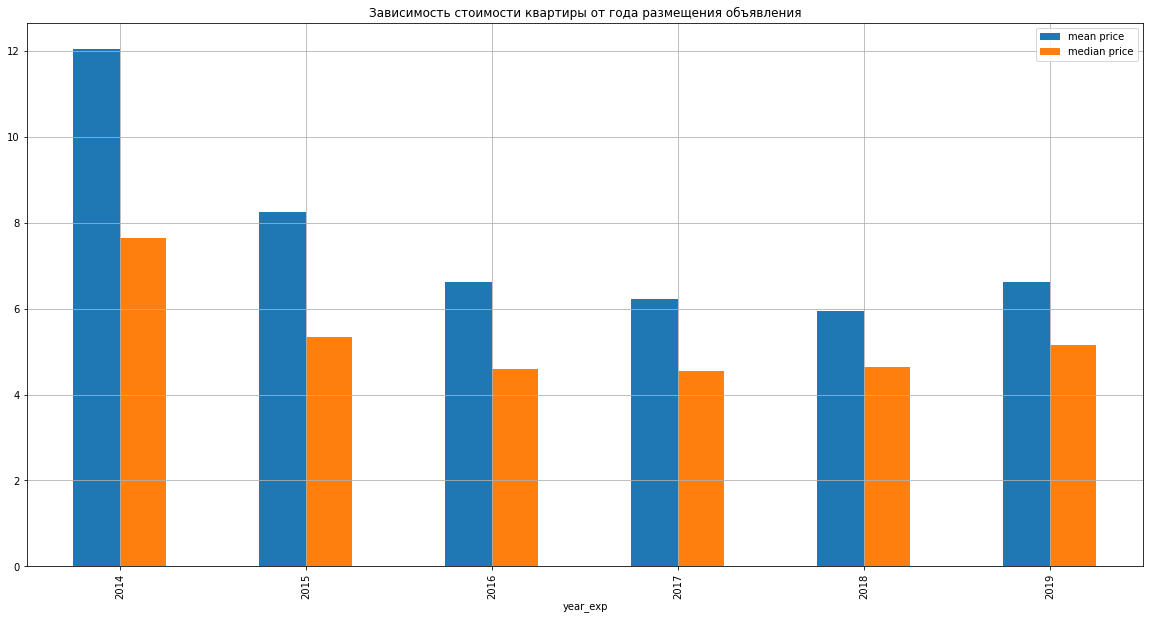

In [71]:
(
    tmp.pivot_table(
        index='year_exp', 
        values='last_price_mil', 
        aggfunc=['mean', 'median'])
    .plot(
        kind='bar', 
        grid=True, 
        figsize=(20, 10),
        title='Зависимость стоимости квартиры от года размещения объявления')
)
plt.legend(['mean price','median price'], loc=1)
plt.show()

По трем получившимся графикам можно сделать вывод, что день, месяц и год не влияют на стоимость квартиры, однако стоит заметить, что в 2014 году стоимость была порядком выше, чем в последующие годы.

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Необходимо посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [72]:
# делаем сводную таблицу
top10 = (
    tmp.pivot_table(
        index='locality_name', 
        values='m2_price', 
        aggfunc=['count','mean'])
)

# меняем название столбцов
top10.columns = ['Количество объявлений', 'Средняя цена 1м²']

# сортируем таблицу по количеству объявлений в порядке убывания
# и оставляем 10 населенных пунктом с наибольшим количеством объявлений
top10 = (
    top10
    .sort_values(by='Количество объявлений', ascending=False)
    .head(10)
    .style.format("{:.2f}")
    .background_gradient(cmap='Greens', axis=0)
)

In [73]:
top10

,Количество объявлений,Средняя цена 1м²
locality_name,,
Санкт-Петербург,15351.00,113637.09
поселок Мурино,487.00,84508.97
поселок Шушары,421.00,78235.32
Всеволожск,390.00,68688.20
Пушкин,365.00,103163.25
Колпино,335.00,75204.21
поселок Парголово,321.00,90451.86
Гатчина,302.00,68846.42
деревня Кудрово,269.00,91806.65


Мы получили таблицу, по которой можем сказать, что самое большое количество объявлений, значительно превышающее количество в других населенных пунктов, находится в Санкт-Петербурге. Самая высокая стоимость 1м² также в Санкт-Петербурге.  
Наиболее низкая стоимость 1м² в Выборге.

#### Зависимость стоимости объекта от расстояния до центра города в Санкт-Петербурге

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. Построим график изменения средней цены для каждого километра от центра Петербурга.

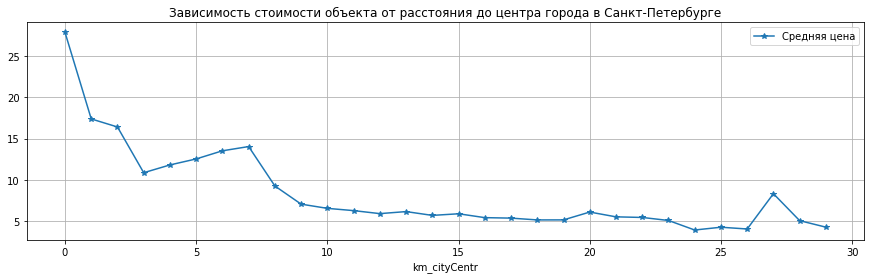

In [74]:
df_sp = (
    tmp.query('locality_name == "Санкт-Петербург"')
    .pivot_table(
        index='km_cityCentr', 
        values='last_price_mil')
    .plot(
        grid=True, 
        figsize=(15, 4), 
        style='*-', 
        legend= 'fds', 
        title='Зависимость стоимости объекта от расстояния до центра города в Санкт-Петербурге')
)

plt.legend(['Средняя цена'])
plt.show()

Глядя на график, можно с уверенностью сказать, что удаленность от центра города в Санкт-Петербурге напрямую влияет на стоимость квартиры. Чем дальше расположен объект, тем меньше цена. Объекты в центре города имеют наивысший пик стоимости, отличающийся от остальных в разы.

### Общий вывод

Перед нами было поставлена **задача провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов**, что позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. Для ее решения нам был предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. *Часть данных* в таблице была вписана *пользователем*, *другая — получена автоматически* на основе картографических данных.

На этапе **предообработки** в представленной таблице нами было обноружено, что большая часть столбцов имела пропущенные значение, в связи с чем были приняты следующие решения:
- пропуски в столбцах, *где долю пропусков менее половины одного, были удалены*;
- пустые значения в столбцах, которые были очевидно оставлены нарочно, *заменены на нули или на булево значение False* (в зависимости от типа столбца);
- часть столбцов заполнена их *медианным значением*;
- там, где это невозможно, пропуски *оставлены в изначальном виде*.  

Помимо этого в некоторых столбцах был *изменен тип данных, удалены неявные дубликаты*. На основе имеющихся данных таблицы были *добавлены новые столбцы* для анализа.

По результатам анализа можно сделать вывод, что основополагающими факторами на образование цены в прямой зависимости стали следующие параметры:
1. **Общая площадь** объекта (жилая площадь и площадь кухни в чуть меньшей степени) - чем больше площадь, тем выше цена;
2. С увелечением в объекте **количества комнат** растет его цена;
3. **Населенный пункт** - так цена объекта в Санкт-Петербурге будет значительно выше нежели в других соседних нас. пунктах; 
4. **Удаленность от центра города** - непосредственно в самом Петербурге цена объекта около центра будет самой высокой и постепенно уменьшаться по мере удаления от центра.  

Также стоит обратить внимание, что в большинстве случаев квартиры, расположенные на первых этажах домов, будут стоить дешевле других, а дата размещения объявления ни на что не влияет.

Стоит отметить, что в среднем квартиры продавались за 182 дня, медианное значение составляет 97 дней. 
Быстрыми можно считать продажи в течение полутора месяца, долгими - от 230 дней и более. 

*P.S.* Рекомендуется улучшить сбор данных: *исключить* допущение *пропусков данных*, сделать все *поля обязательными к заполнению*, в поле с указанием населенного пункта *исключить свободный ввод*, добавив вместого этого *выпадающий список* с заранее прописанными названиями населенных пунктов.  
Сотрудникам обрабатывающим информацию в таблицу порекомендовать быть *более внимательными при заполнении* и минимизировать число допущенных ошибок.  
*Наладить сбор картографических данных*, исключив случаи с пропущенными значениями в каких бы то ни было расстояниях. Рекомендуется исключить параметр *площадь кухни* на параметр "*нежилая площадь*", либо, при необходимости оставить площадь кухни, добавить колонки с прочей нежилой площадью (сан-узлы, кориодоры и т.д.).